In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
%matplotlib inline
plt.style.use('seaborn')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

## 데이터 전처리

In [2]:
shop_01_df = pd.read_csv('./data_set/201906_01.csv')
shop_01_df.shape

(565016, 39)

In [3]:
shop_01_df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
3,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [4]:
shop_01_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 39 columns):
상가업소번호       565016 non-null int64
상호명          565015 non-null object
지점명          75524 non-null object
상권업종대분류코드    565016 non-null object
상권업종대분류명     565016 non-null object
상권업종중분류코드    565016 non-null object
상권업종중분류명     565016 non-null object
상권업종소분류코드    565016 non-null object
상권업종소분류명     565016 non-null object
표준산업분류코드     532064 non-null object
표준산업분류명      532064 non-null object
시도코드         565016 non-null int64
시도명          565016 non-null object
시군구코드        565016 non-null int64
시군구명         565016 non-null object
행정동코드        565016 non-null int64
행정동명         565016 non-null object
법정동코드        565016 non-null int64
법정동명         565016 non-null object
지번코드         565016 non-null int64
대지구분코드       565016 non-null int64
대지구분명        565016 non-null object
지번본번지        565016 non-null int64
지번부번지        467893 non-null float64
지번주소         565016 non-null obje

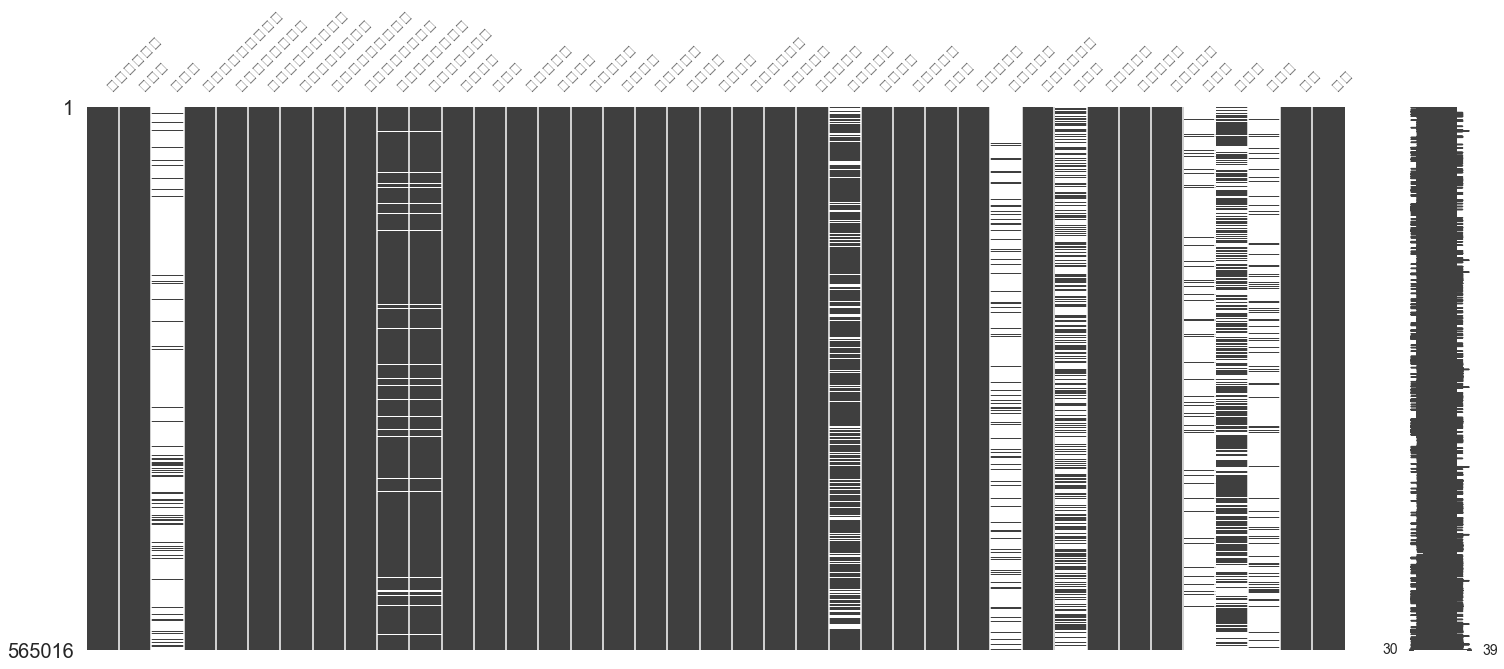

In [5]:
msno.matrix(shop_01_df)

In [6]:
shop_01_df.isnull().sum()

상가업소번호            0
상호명               1
지점명          489492
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      32952
표준산업분류명       32952
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         97123
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        494164
건물관리번호            0
건물명          303808
도로명주소             0
구우편번호             0
신우편번호             9
동정보          514802
층정보          220463
호정보          481880
경도                0
위도                0
dtype: int64

데이터들이 null값을 가지고 있다. 결측치를 처리하기 전에 먼저 사용할 컬럼부터 추려보자.

In [7]:
shop_01_select_df = shop_01_df[['상호명','시도명', '시군구명','행정동명','법정동명','지번주소', '도로명주소',
                       '상권업종대분류명','상권업종중분류명','상권업종소분류명','경도','위도']]

In [8]:
shop_01_select_df.head()

,상호명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,상권업종대분류명,상권업종중분류명,상권업종소분류명,경도,위도
0,커피빈코리아선릉로93길점,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길 6,음식,커피점/카페,커피전문점/카페/다방,127.047883,37.505675
1,프로포즈,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로 34-6,음식,유흥주점,호프/맥주,126.899220,37.471711
2,싱싱커피&토스트,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로 37,음식,패스트푸드,토스트전문,128.980455,35.159774
3,와라와라호프,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로 2933,음식,유흥주점,호프/맥주,127.061026,37.493922
4,가락사우나내스낵,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로 71,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,127.104071,37.500249


In [9]:
shop_01_select_df.shape

(565016, 12)

In [10]:
shop_01_select_df.isnull().sum()

상호명         1
시도명         0
시군구명        0
행정동명        0
법정동명        0
지번주소        0
도로명주소       0
상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
경도          0
위도          0
dtype: int64

필요한 feature를 뽑아내고 나니 null값이 1개가 나왔다. 1개는 그냥 지워버리겠다.

In [11]:
shop_01_select_df[shop_01_select_df['상호명'].isnull() == True]

,상호명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,상권업종대분류명,상권업종중분류명,상권업종소분류명,경도,위도
403686,NaN,부산광역시,부산진구,부전2동,부전동,부산광역시 부산진구 부전동 573-1,부산광역시 부산진구 중앙대로 717,소매,가방/신발/액세서리,가방/가죽제품소매,129.059161,35.155254


In [12]:
shop_01_select_df.drop(403686, axis=0, inplace=True)

In [13]:
shop_01_select_df.isnull().sum()

상호명         0
시도명         0
시군구명        0
행정동명        0
법정동명        0
지번주소        0
도로명주소       0
상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
경도          0
위도          0
dtype: int64

## 데이터 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


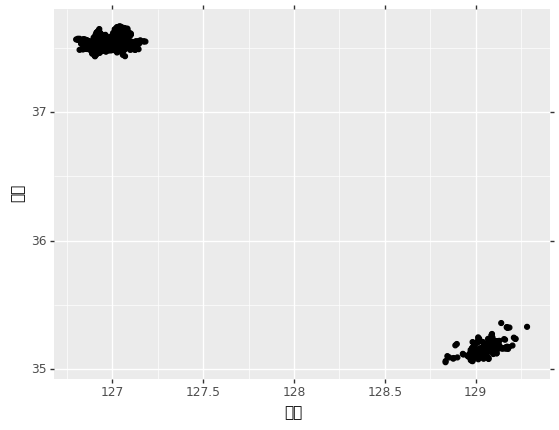

<ggplot: (-9223371890469657642)>

In [14]:
(ggplot(shop_01_select_df[:1000])
+ aes(x='경도', y='위도')
+ geom_point()
+ theme(text=element_text(family='NanumBarunGothic'))
)

데이터가 크게 나눠져 있는 것 같다. 서울에 가장 많은 음식점이 분포되어 있으니 서울과 나머지 지역으로 나눠보자

In [15]:
shop_seoul = shop_01_select_df.loc[shop_01_select_df['도로명주소'].str.startswith('서울')]
shop_except_seoul = shop_01_select_df.loc[~shop_01_select_df['도로명주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(401071, 12)
(163944, 12)


In [16]:
shop_seoul.head()

,상호명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,상권업종대분류명,상권업종중분류명,상권업종소분류명,경도,위도
0,커피빈코리아선릉로93길점,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길 6,음식,커피점/카페,커피전문점/카페/다방,127.047883,37.505675
1,프로포즈,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로 34-6,음식,유흥주점,호프/맥주,126.899220,37.471711
3,와라와라호프,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로 2933,음식,유흥주점,호프/맥주,127.061026,37.493922
4,가락사우나내스낵,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로 71,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,127.104071,37.500249
5,석봉토스트,서울특별시,광진구,구의2동,구의동,서울특별시 광진구 구의동 77-47,서울특별시 광진구 자양로39길 20,음식,패스트푸드,토스트전문,127.088387,37.549245


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


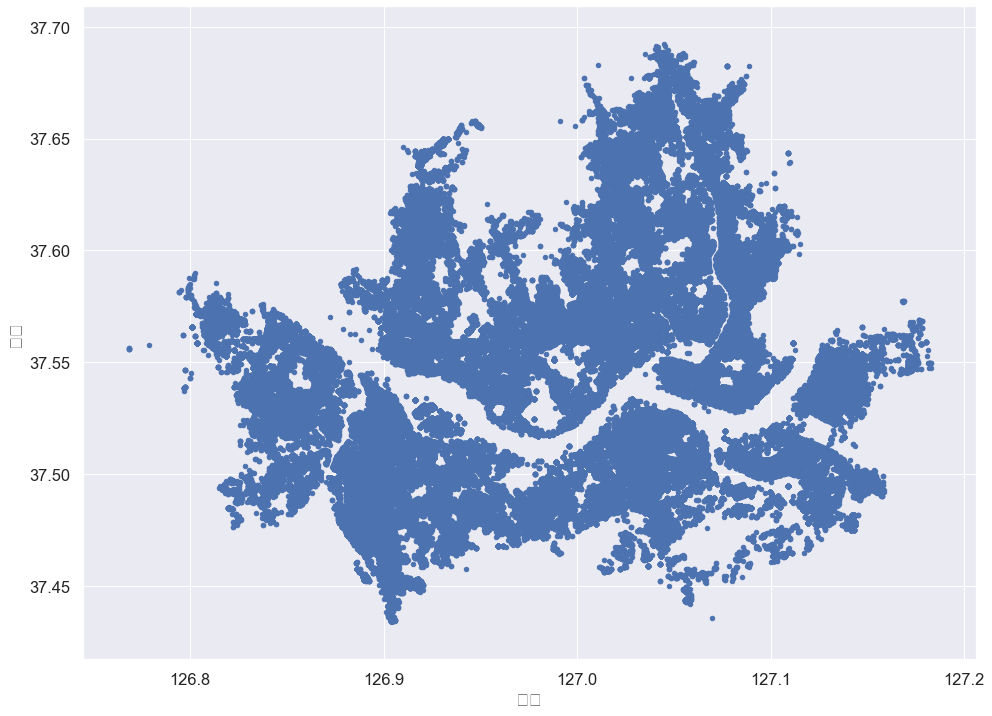

In [17]:
shop_seoul.plot.scatter(x='경도', y='위도', figsize=(16,12), grid=True)

위치기반으로 찍으니 서울의 지도와 비슷하게 나온다. 총 401071 개의 음식점이 있다.

배달 음식은 거리가 멀면 안되기 때문에 행정동명으로 나눈 지역의 음식점 수를 비교해봤다.

In [18]:
shop_01_select_df['행정동명'].value_counts().sort_values(ascending=False)[:10]

역삼1동           10218
종로1.2.3.4가동     6359
부전2동            4809
서교동             4722
신촌동             4426
대치4동            4269
회현동             4030
영등포동            3920
압구정동            3789
반포4동            3441
Name: 행정동명, dtype: int64

가장 높은 순으로 10개를 뽑았는데 부전2동만 부산이고  제외한 나머지가 모두 서울이다.
일단 가장 음식점이 많은 역삼1동부터 분석해보겠다.

In [19]:
shop_region_ys = shop_01_select_df[shop_01_select_df['행정동명'] == '역삼1동']
shop_region_ys['상권업종대분류명'].value_counts()

음식          3965
소매          2493
생활서비스       1634
부동산          613
의료           578
학문/교육        511
관광/여가/오락     345
숙박            76
스포츠            3
Name: 상권업종대분류명, dtype: int64

In [20]:
shop_region_ys['상권업종중분류명'].unique()

array(['커피점/카페', '분식', '책/서적/도서', '선물/팬시/기념품', '약국/한약방', '학원-음악미술무용',
       '부동산중개', '병원', '화장품소매', '이/미용/건강', '기타서비스업', '연극/영화/극장', '기타판매업',
       '무도/유흥/가무', '종합소매점', '한식', '학원기타', '장례/묘지', '학원-자격/국가고시', '유흥주점',
       '주유소/충전소', '호텔/콘도', '분양', '사무/문구/컴퓨터', '양식', '중식', '학원-보습교습입시',
       '패스트푸드', '일식/수산물', '의복의류', 'PC/오락/당구/볼링등', '광고/인쇄', '물품기기대여',
       '자동차/자동차용품', '대행업', '가정/주방/인테리어', '가구소매', '요가/단전/마사지', '학원-어학',
       '세탁/가사서비스', '유아용품', '건강/미용식품', '모텔/여관/여인숙', '주택수리', '개인/가정용품수리',
       '인력/고용/용역알선', '개인서비스', '법무세무회계', '사진/광학/정밀기기소매', '음/식료품소매',
       '행사/이벤트', '유사의료업', '닭/오리요리', '예식/의례/관혼상제', '애견/애완/동물', '제과제빵떡케익',
       '경마/경륜/성인오락', '운동/경기용품소매', '중고품소매/교환', '사진', '대중목욕탕/휴게', '도서관/독서실',
       '학문교육기타', '자동차/이륜차', '학원-컴퓨터', '의료관련서비스업', '놀이/여가/취미',
       '철물/난방/건설자재소매', '시계/귀금속소매', '민박/하숙', '별식/퓨전요리', '의약/의료품소매',
       '가방/신발/액세서리', '가전제품소매', '평가/개발/관리', '운송/배달/택배', '학원-창업취업취미',
       '취미/오락관련소매', '페인트/유리제품소매', '부페', '학원-예능취미체육', '예술품/골동품/수석/분재',
       '음식배달서비스', '

중,소분류로 일일이 배달될 것 같은 업체를 고를 수 있지만 현재로는 어떤 영역을 배송할 것인지에 대한 정보가 없으니 일단 대분류의 음식만 보면 3,965개의 업체가 있다.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


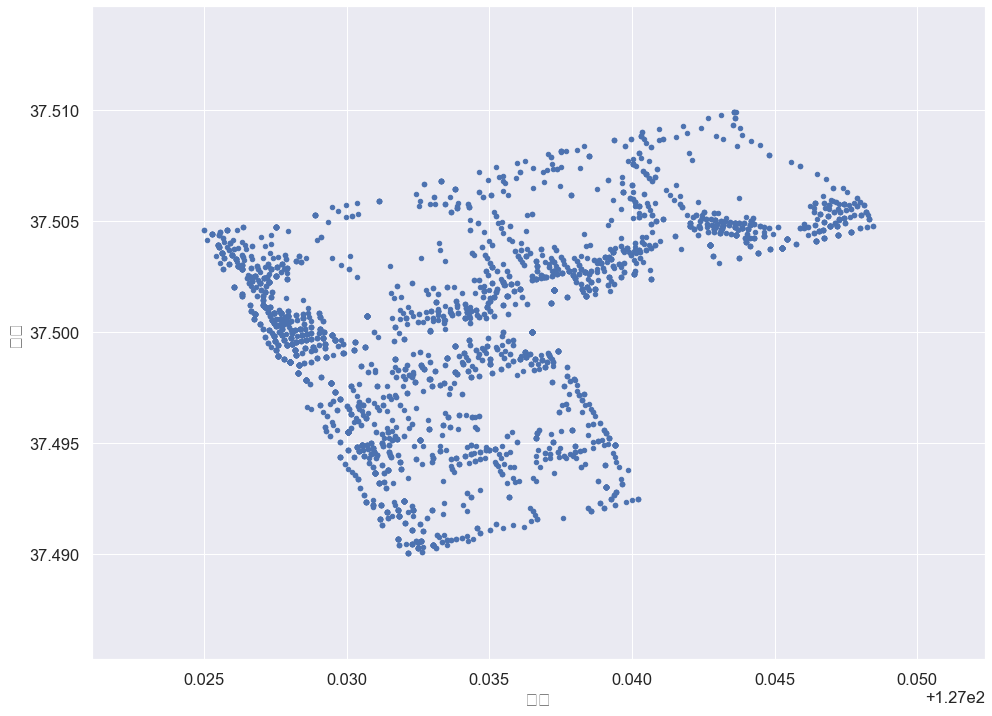

In [21]:
shop_region_ys_food = shop_region_ys[shop_region_ys['상권업종대분류명'] == '음식']
shop_region_ys_food.plot.scatter(x='경도', y='위도', figsize=(16,12), grid=True)

## EDA

## 통계분석

## 데이터 마이닝

데이터가 없기때문에 정말 간단히 주먹구구식으로 계산을 해보자.
역삼1동 인구가 하루 3끼를 모두 시켜먹는다고 가정하면

(인구수X3) / (음식점 수) = (36,377X3) / (3965) = 27.52

즉, 인구가 늘지 않고 음식점이 늘지 않는다면 하루에 109,131번의 음식을 주문하고 음식점당 27번 주문을 시킨다. 음식점 당 27번(하루)의 주문에서 데이터 분석 문제 1번에서 제시한 a, b, c를 높여서 요리할때의 비용보다 배달주문 했을때의 비용이 적게나와야 하는것이다.